In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import  Ridge, LinearRegression, SGDRegressor, Lasso, ElasticNet
import matplotlib.gridspec as gridspec
import missingno as msno #checking for missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

KeyboardInterrupt: 

In [1]:
test_data = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Scoring models\Kaggle 1 (housing prices)\test.csv")
train_data = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Scoring models\Kaggle 1 (housing prices)\train.csv")
train_data.head()

NameError: name 'pd' is not defined

In [3]:
train_data = train_data.drop(['Id'] , axis =1)
test_data = test_data.drop(['Id'] , axis =1)

#Extracting numerical data
train_data_numerical = train_data.select_dtypes(include=['int64', 'float64'])
test_data_numerical =  test_data.select_dtypes(include=['int64', 'float64'])

In [4]:
train_data_numerical.isnull().sum()

Room           0
Price          0
Size           0
Floor          0
FloorsTotal    0
dtype: int64

In [5]:
test_data_numerical.isnull().sum()

Room           0
Size           0
Floor          0
FloorsTotal    0
dtype: int64

In [6]:
sum(train_data_numerical.duplicated())

279

In [7]:
sum(test_data_numerical.duplicated())

2815

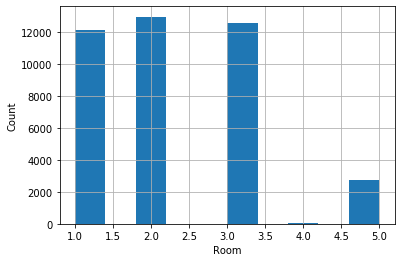

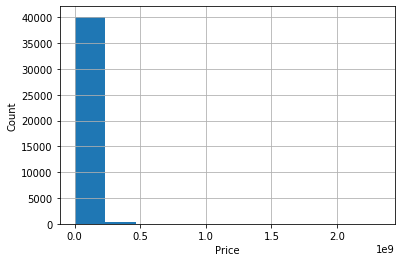

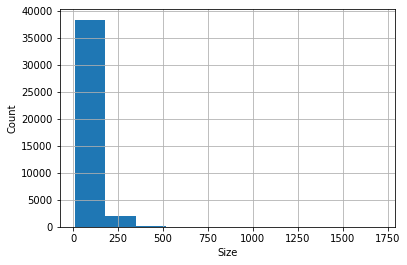

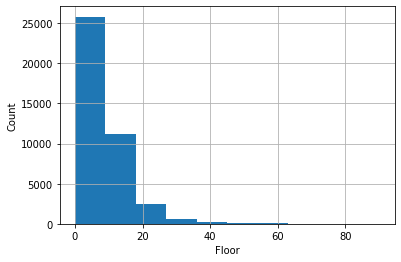

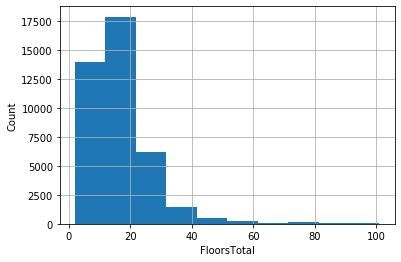

In [8]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in train_data_numerical:
    data = train_data_numerical.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

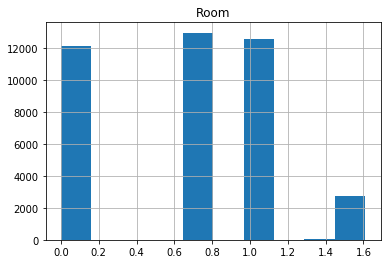

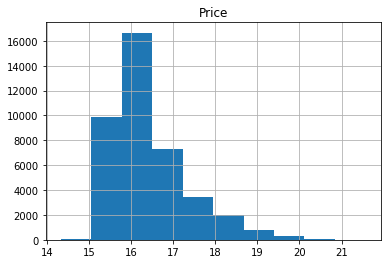

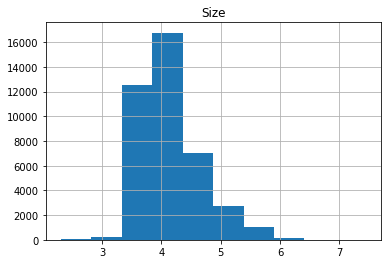

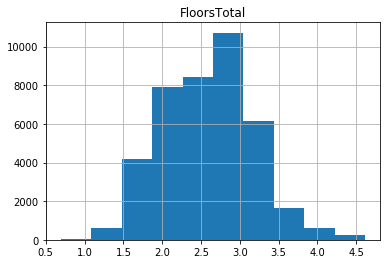

In [9]:
## Here, we observe that some of the features don't follow the gaussian distribution. We can apply log transformation further.
## We will be using logarithmic transformation

for feature in train_data_numerical:
    data = train_data_numerical.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data[feature].hist()
        plt.title(feature)
        plt.show()

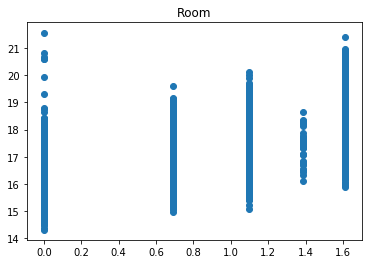

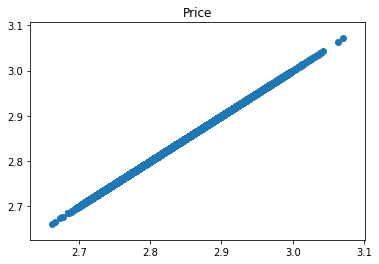

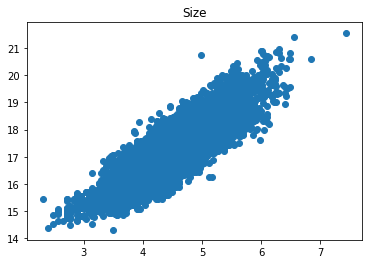

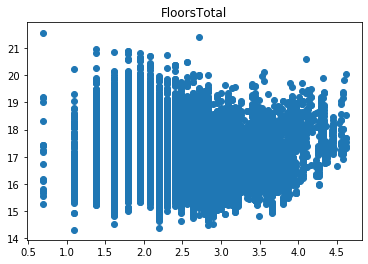

In [10]:
# let's see the relationship between SalePrice and these continuous variales

for feature in train_data_numerical:
    data = train_data_numerical.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['Price'] = np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.title(feature)
        plt.show()

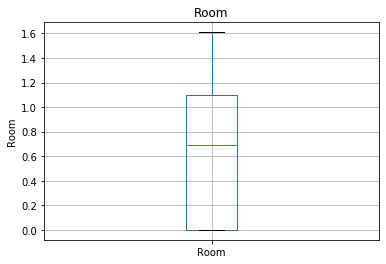

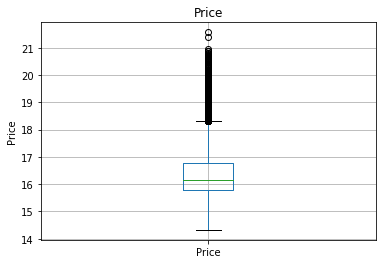

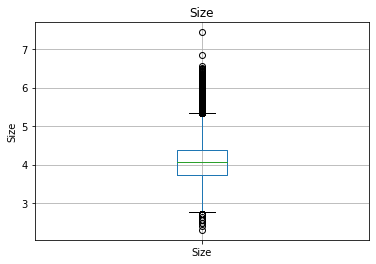

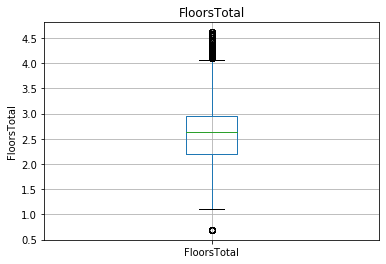

In [11]:
for feature in train_data_numerical:
    data= train_data_numerical.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [12]:
#Extracting categorical  data
train_data_categorical = train_data.select_dtypes(include=['object'])
test_data_categorical =  test_data.select_dtypes(include=['object'])

In [13]:
train_data_categorical.head()

,Balcony,Walls,Age,Lift,District,Okrug
0,балкон,NaN,вторичка,NaN,Сокол,САО
1,NaN,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,балкон,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,NaN,кирпичный,вторичка,NaN,Басманный,ЦАО
4,NaN,монолитный,вторичка,грузовой,Хорошевский,САО


In [14]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

categorical_features_nan = [feature for feature in train_data_categorical.columns if train_data_categorical[feature].isnull().sum() > 0 and train_data_categorical[feature].dtypes == 'O']


for feature in categorical_features_nan:
    print(f"{feature}: {np.round(train_data_categorical[feature].isnull().mean(),4)}% missing values")

Balcony: 0.3148% missing values
Walls: 0.1453% missing values
Age: 0.0134% missing values
Lift: 0.2327% missing values
District: 0.0088% missing values
Okrug: 0.0088% missing values


In [15]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

categorical_features_nan = [feature for feature in test_data_categorical.columns if test_data_categorical[feature].isnull().sum() > 0 and test_data_categorical[feature].dtypes == 'O']


for feature in categorical_features_nan:
    print(f"{feature}: {np.round(test_data_categorical[feature].isnull().mean(),4)}% missing values")

Balcony: 0.3189% missing values
Walls: 0.1486% missing values
Age: 0.0143% missing values
Lift: 0.2248% missing values
District: 0.0096% missing values
Okrug: 0.0096% missing values


In [16]:
train_data.head()

,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,5,210020000.0,198,балкон,1,2,NaN,вторичка,NaN,Сокол,САО
1,2,17630000.0,64,NaN,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,5,142400000.0,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,5,142520000.0,265,NaN,5,5,кирпичный,вторичка,NaN,Басманный,ЦАО
4,3,34070000.0,88,NaN,10,42,монолитный,вторичка,грузовой,Хорошевский,САО


In [17]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
print(f'Number of Numerical Features are {len(numerical_features)}')

Number of Numerical Features are 5


In [18]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
print(f'Number of Categorical Features are {len(categorical_features)}')

Number of Categorical Features are 6


In [19]:
train_data['Balcony'].value_counts()

лоджия    16317
балкон    11441
Name: Balcony, dtype: int64

In [20]:
train_data['Balcony'].isnull().sum()

12750

In [21]:
train_data['Balcony'] = train_data['Balcony'].fillna('NoBalcony')
train_data['Balcony'].value_counts()

лоджия       16317
NoBalcony    12750
балкон       11441
Name: Balcony, dtype: int64

In [22]:
test_data['Balcony'] = test_data['Balcony'].fillna('NoBalcony')
test_data['Balcony'].value_counts()

лоджия       4081
NoBalcony    3229
балкон       2817
Name: Balcony, dtype: int64

In [23]:
train_data['Walls'] = train_data['Walls'].fillna('Missing')
train_data['Walls'].value_counts()

панельный дом          12853
монолитный             10211
кирпичный               6684
Missing                 5885
кирпично-монолитный     2816
блочный                 2059
Name: Walls, dtype: int64

In [24]:
test_data['Walls'] = test_data['Walls'].fillna('Missing')
test_data['Walls'].value_counts()

панельный дом          3233
монолитный             2486
кирпичный              1639
Missing                1505
кирпично-монолитный     730
блочный                 534
Name: Walls, dtype: int64

In [25]:
train_data['Age'].value_counts()

вторичка       33072
новостройка     6895
Name: Age, dtype: int64

In [26]:
test_data['Age'].value_counts()

вторичка       8282
новостройка    1700
Name: Age, dtype: int64

In [27]:
train_data['Lift'] = train_data['Lift'].fillna('NoLift')
train_data['Lift'].value_counts()

грузовой        19545
пассажирский    11537
NoLift           9426
Name: Lift, dtype: int64

In [28]:
test_data['Lift'] = test_data['Lift'].fillna('NoLift')
test_data['Lift'].value_counts()

грузовой        4878
пассажирский    2972
NoLift          2277
Name: Lift, dtype: int64

In [29]:
train_data['District'].value_counts()

Раменки              1487
Пресненский          1391
Хамовники            1137
Хорошёво-Мневники    1100
Некрасовка            976
                     ... 
Метрогородок           67
Восточный              30
Молжаниновский         29
Капотня                17
Внуково                 6
Name: District, Length: 120, dtype: int64

In [30]:
train_data['District'].isnull().sum()

357

In [31]:
train_data['District'] = train_data['District'].fillna('Missing')
train_data['District'].value_counts()

Раменки              1487
Пресненский          1391
Хамовники            1137
Хорошёво-Мневники    1100
Некрасовка            976
                     ... 
Метрогородок           67
Восточный              30
Молжаниновский         29
Капотня                17
Внуково                 6
Name: District, Length: 121, dtype: int64

In [32]:
train_data['District'].isnull().sum()

0

In [33]:
test_data['District'] = test_data['District'].fillna('Missing')
test_data['District'].value_counts()

Пресненский          334
Раменки              332
Хорошёво-Мневники    290
Хамовники            268
Тверской             246
                    ... 
Северный              19
Метрогородок          14
Капотня                6
Восточный              4
Молжаниновский         2
Name: District, Length: 120, dtype: int64

In [34]:
train_data['Okrug'].value_counts()

ЦАО     5854
ЗАО     4953
САО     4413
ЮЗАО    4287
СВАО    4258
ЮАО     4222
ЮВАО    4172
ВАО     4036
СЗАО    3956
Name: Okrug, dtype: int64

In [35]:
train_data['Okrug'].isnull().sum()

357

In [36]:
test_data['Okrug'] = test_data['Okrug'].fillna('Missing')
test_data['Okrug'].value_counts()

ЦАО        1511
ЗАО        1197
САО        1141
ЮЗАО       1106
СВАО       1064
ЮВАО       1048
ВАО         997
СЗАО        989
ЮАО         977
Missing      97
Name: Okrug, dtype: int64

In [37]:
train_data['Okrug'] = train_data['Okrug'].fillna('Missing')
train_data['Okrug'].value_counts()

ЦАО        5854
ЗАО        4953
САО        4413
ЮЗАО       4287
СВАО       4258
ЮАО        4222
ЮВАО       4172
ВАО        4036
СЗАО       3956
Missing     357
Name: Okrug, dtype: int64

In [38]:
train_data.head()

,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,5,210020000.0,198,балкон,1,2,Missing,вторичка,NoLift,Сокол,САО
1,2,17630000.0,64,NoBalcony,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,5,142400000.0,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,5,142520000.0,265,NoBalcony,5,5,кирпичный,вторичка,NoLift,Басманный,ЦАО
4,3,34070000.0,88,NoBalcony,10,42,монолитный,вторичка,грузовой,Хорошевский,САО


In [39]:
test_data.head()

,Room,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,2,58,NoBalcony,2,5,Missing,вторичка,NoLift,Богородский,ВАО
1,5,266,лоджия,3,14,Missing,вторичка,грузовой,Мещанский,ЦАО
2,5,197,лоджия,5,9,Missing,вторичка,грузовой,Басманный,ЦАО
3,5,233,лоджия,3,14,Missing,вторичка,грузовой,Мещанский,ЦАО
4,2,69,NoBalcony,2,6,Missing,вторичка,пассажирский,Красносельский,ЦАО


In [40]:
num_continuous_features_log=['Size', 'FloorsTotal', 'Price']
for feature in num_continuous_features_log:
    train_data[feature] = np.log(train_data[feature])

In [41]:
train_data.head()

,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,5,19.162713,5.288267,балкон,1,0.693147,Missing,вторичка,NoLift,Сокол,САО
1,2,16.685113,4.158883,NoBalcony,3,2.079442,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,5,18.774151,5.081404,балкон,7,1.945910,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,5,18.774993,5.579730,NoBalcony,5,1.609438,кирпичный,вторичка,NoLift,Басманный,ЦАО
4,3,17.343928,4.477337,NoBalcony,10,3.737670,монолитный,вторичка,грузовой,Хорошевский,САО


In [42]:
train_data['Floor'].value_counts()

2     4569
3     3964
4     3702
5     3489
6     2714
      ... 
66       1
57       1
65       1
64       1
62       1
Name: Floor, Length: 80, dtype: int64

In [43]:
num_continuous_features_log=['Size', 'FloorsTotal']
for feature in num_continuous_features_log:
    test_data[feature] = np.log(test_data[feature])

In [44]:
test_data['NumofRooms'] = "1 room"
test_data.loc[test_data['Room'] == 1 , 'NumofRooms'] = "1 room"
test_data.loc[test_data['Room'] == 2 , 'NumofRooms'] = "2 rooms"
test_data.loc[test_data['Room'] >= 3 , 'NumofRooms'] = "3+ rooms"

In [45]:
test_data.head()

,Room,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug,NumofRooms
0,2,4.060443,NoBalcony,2,1.609438,Missing,вторичка,NoLift,Богородский,ВАО,2 rooms
1,5,5.583496,лоджия,3,2.639057,Missing,вторичка,грузовой,Мещанский,ЦАО,3+ rooms
2,5,5.283204,лоджия,5,2.197225,Missing,вторичка,грузовой,Басманный,ЦАО,3+ rooms
3,5,5.451038,лоджия,3,2.639057,Missing,вторичка,грузовой,Мещанский,ЦАО,3+ rooms
4,2,4.234107,NoBalcony,2,1.791759,Missing,вторичка,пассажирский,Красносельский,ЦАО,2 rooms


In [46]:
train_data['NumofRooms'] = "1 room"
train_data.loc[train_data['Room'] == 1 , 'NumofRooms'] = "1 room"
train_data.loc[train_data['Room'] == 2 , 'NumofRooms'] = "2 rooms"
train_data.loc[train_data['Room'] >= 3 , 'NumofRooms'] = "3+ rooms"

In [47]:
train_data.head()

,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug,NumofRooms
0,5,19.162713,5.288267,балкон,1,0.693147,Missing,вторичка,NoLift,Сокол,САО,3+ rooms
1,2,16.685113,4.158883,NoBalcony,3,2.079442,монолитный,вторичка,грузовой,Зюзино,ЮЗАО,2 rooms
2,5,18.774151,5.081404,балкон,7,1.945910,кирпичный,вторичка,пассажирский,Пресненский,ЦАО,3+ rooms
3,5,18.774993,5.579730,NoBalcony,5,1.609438,кирпичный,вторичка,NoLift,Басманный,ЦАО,3+ rooms
4,3,17.343928,4.477337,NoBalcony,10,3.737670,монолитный,вторичка,грузовой,Хорошевский,САО,3+ rooms


In [48]:
train_data = train_data.drop(['Room'] , axis =1)

In [49]:
test_data = test_data.drop(['Room'] , axis =1)

In [50]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
print(f'Number of Numerical Features are {len(numerical_features)}')

Number of Numerical Features are 4


In [51]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
print(f'Number of Categorical Features are {len(categorical_features)}')

Number of Categorical Features are 7


In [52]:
train_data['Age'].isnull().sum()

541

In [53]:
train_data['Age'] = train_data['Age'].fillna('Missing')
train_data['Age'].value_counts()

вторичка       33072
новостройка     6895
Missing          541
Name: Age, dtype: int64

In [54]:
test_data['Age'] = test_data['Age'].fillna('Missing')
test_data['Age'].value_counts()

вторичка       8282
новостройка    1700
Missing         145
Name: Age, dtype: int64

In [55]:
# Let's encode the categorical variables
## ordinal encoder encoded the values alphabetically e.g Sex(Male and Female) ~ it will be encoded as Sex(0,1) cause F comes first and then M

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_data[categorical_features] = enc.fit_transform(train_data[categorical_features])
test_data[categorical_features] = enc.fit_transform(test_data[categorical_features])

In [56]:
train_data.head()

,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug,NumofRooms
0,19.162713,5.288267,1.0,1,0.693147,0.0,1.0,0.0,92.0,3.0,2.0
1,16.685113,4.158883,0.0,3,2.079442,4.0,1.0,1.0,31.0,9.0,1.0
2,18.774151,5.081404,1.0,7,1.945910,3.0,1.0,2.0,78.0,6.0,2.0
3,18.774993,5.579730,0.0,5,1.609438,3.0,1.0,0.0,7.0,6.0,2.0
4,17.343928,4.477337,0.0,10,3.737670,4.0,1.0,1.0,107.0,3.0,2.0


In [57]:
test_data.head()

,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug,NumofRooms
0,4.060443,0.0,2,1.609438,0.0,1.0,0.0,13.0,1.0,1.0
1,5.583496,2.0,3,2.639057,0.0,1.0,1.0,56.0,6.0,2.0
2,5.283204,2.0,5,2.197225,0.0,1.0,1.0,7.0,6.0,2.0
3,5.451038,2.0,3,2.639057,0.0,1.0,1.0,56.0,6.0,2.0
4,4.234107,0.0,2,1.791759,0.0,1.0,2.0,40.0,6.0,1.0


In [180]:
corr_mat = train_data.corr()

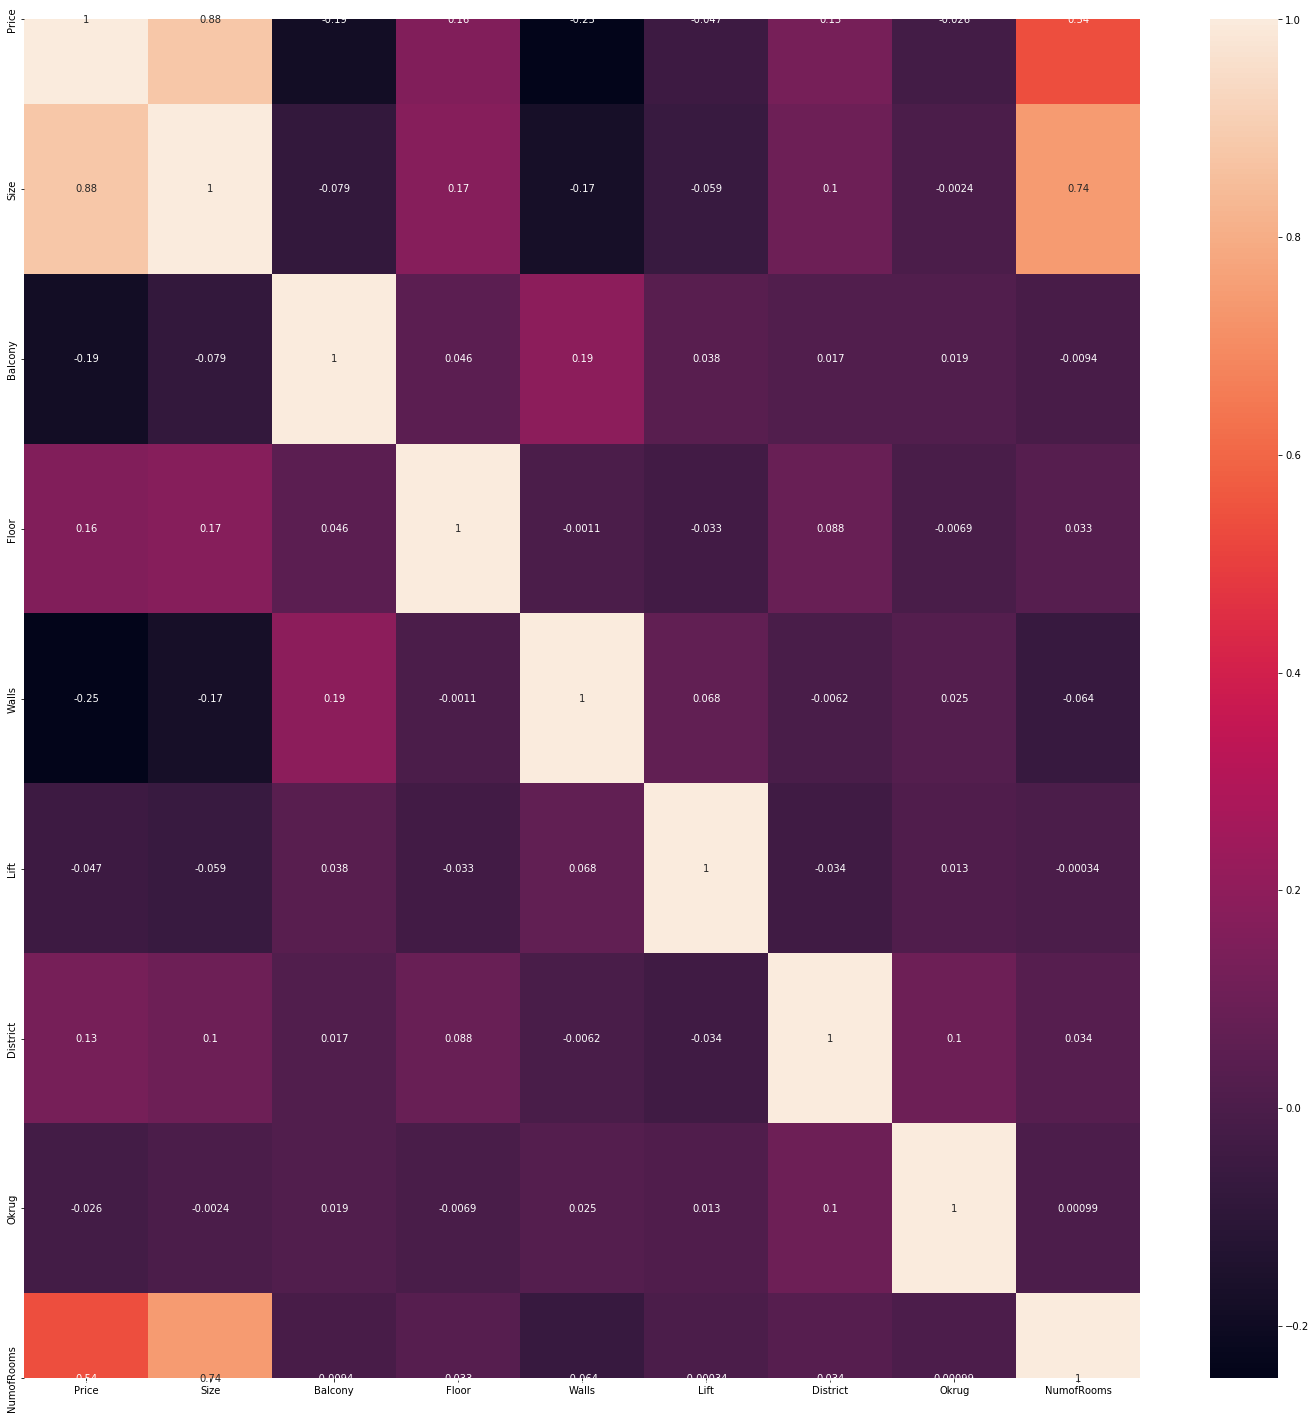

In [181]:
plt.figure(figsize = (25, 25))
sns.heatmap(corr_mat, annot = True)

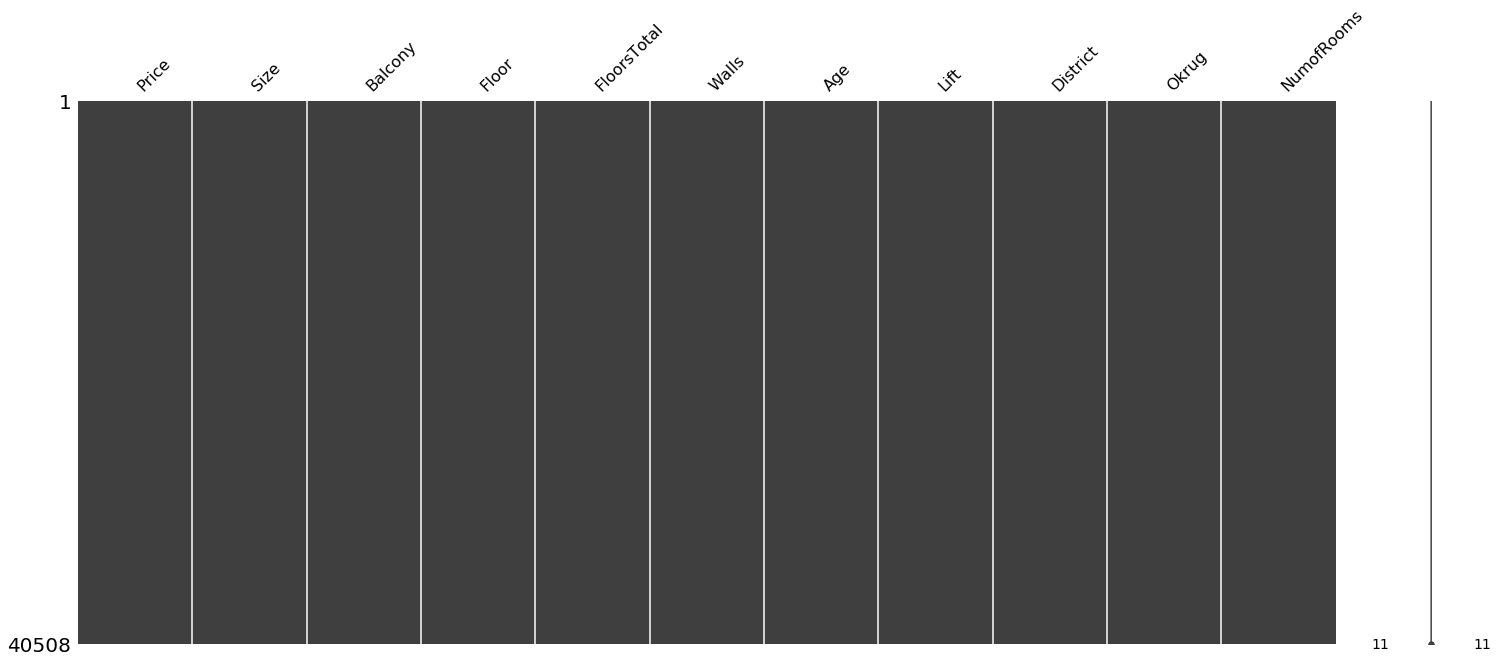

In [60]:
msno.matrix(train_data)

In [145]:
from sklearn.model_selection import train_test_split



X = train_data.drop('Price',axis=1)
y = train_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [146]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [147]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import statistics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):
    mae=np.round(mean_absolute_error(true, predicted),3)
    mse=np.round(mean_squared_error(true, predicted),3)
    rmse=np.round(np.sqrt(mean_squared_error(true, predicted)),3)
    r2_square=np.round(r2_score(true, predicted),3)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Score:', r2_square)

def cross_val(model, X, y):
    pred=cross_val_score(model, X,y,cv=10)
    return np.round(pred.mean(),3)

def evaluate(true, predicted):
    mae=np.round(mean_absolute_error(true, predicted),3)
    mse=np.round(mean_squared_error(true, predicted),3)
    rmse=np.round(np.sqrt(mean_squared_error(true, predicted)),3)
    r2_square=np.round(r2_score(true, predicted),3)
    
    return mae,mse,rmse,r2_square 
    

In [148]:
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lin_reg, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.281
MSE:  0.138
RMSE:  0.372
R2 Score: 0.827
--------------------------------

Cross_validation score:



0.826

In [149]:
results_df=pd.DataFrame(data=[['Linear Regression', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,0.138,0.372,0.827,0.826


In [150]:
el=ElasticNet()
el.fit(X_train, y_train)

train_pred=el.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(el, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.673
MSE:  0.771
RMSE:  0.878
R2 Score: 0.034
--------------------------------

Cross_validation score:



0.033

In [151]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

train_pred=rfr.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(rfr, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.057
MSE:  0.007
RMSE:  0.083
R2 Score: 0.991
--------------------------------

Cross_validation score:



0.938

In [152]:
results_df=results_df.append(pd.DataFrame(data=[['RandomForestRegressor', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,0.138,0.372,0.827,0.826
1,RandomForestRegressor,0.057,0.007,0.083,0.991,0.938


In [70]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.278,0.133,0.365,0.833,0.833
1,RandomForestRegressor,0.053,0.006,0.078,0.992,0.944


In [153]:
lr = SGDRegressor()
lr.fit(X_train, y_train)

train_pred=lr.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lr, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  5795374.048
MSE:  61545760192327.18
RMSE:  7845110.591
R2 Score: -77122016641327.38
--------------------------------

Cross_validation score:



-3.811085244044518e+20

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

X_train_2_d=poly_reg.fit_transform(X_train)

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d, y_train)

train_pred=lin_reg.predict(X_train_2_d)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(el, X_train_2_d, y_train)
print('Cross_validation score:\n')
cross_score

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Train set evaluation:

MAE:  0.249
MSE:  0.109
RMSE:  0.33
R2 Score: 0.863
--------------------------------

Cross_validation score:



0.786

In [154]:
results_df=results_df.append(pd.DataFrame(data=[['Polynomial Regression', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
1,RandomForestRegressor,0.057,7.000000e-03,0.083,9.910000e-01,9.380000e-01
2,Polynomial Regression,5795374.048,6.154576e+13,7845110.591,-7.712202e+13,-3.811085e+20


In [155]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

train_pred=lasso.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(lasso, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.284
MSE:  0.141
RMSE:  0.375
R2 Score: 0.824
--------------------------------

Cross_validation score:



0.823

In [156]:
ridge=Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

train_pred=ridge.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(ridge, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.281
MSE:  0.138
RMSE:  0.372
R2 Score: 0.827
--------------------------------

Cross_validation score:



0.826

In [157]:
results_df=results_df.append(pd.DataFrame(data=[['Ridge', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
1,RandomForestRegressor,0.057,7.000000e-03,0.083,9.910000e-01,9.380000e-01
2,Polynomial Regression,5795374.048,6.154576e+13,7845110.591,-7.712202e+13,-3.811085e+20
3,Ridge,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01


In [158]:
# Train an XGBoost regressor model 
import xgboost as xgb
xb = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
xb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [159]:
result = xb.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9225023421171363


In [160]:
train_pred=xb.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(xb, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.166
MSE:  0.054
RMSE:  0.232
R2 Score: 0.933
--------------------------------

Cross_validation score:



0.927

In [161]:
results_df=results_df.append(pd.DataFrame(data=[['XGBoost', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
1,RandomForestRegressor,0.057,7.000000e-03,0.083,9.910000e-01,9.380000e-01
2,Polynomial Regression,5795374.048,6.154576e+13,7845110.591,-7.712202e+13,-3.811085e+20
3,Ridge,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
4,XGBoost,0.166,5.400000e-02,0.232,9.330000e-01,9.270000e-01


In [162]:
xb2 = xgb.XGBRegressor()
xb2.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [163]:
train_pred=xb2.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(xb2, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.13
MSE:  0.033
RMSE:  0.183
R2 Score: 0.958
--------------------------------

Cross_validation score:



0.942

In [164]:
results_df=results_df.append(pd.DataFrame(data=[['XGBoost2', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
1,RandomForestRegressor,0.057,7.000000e-03,0.083,9.910000e-01,9.380000e-01
2,Polynomial Regression,5795374.048,6.154576e+13,7845110.591,-7.712202e+13,-3.811085e+20
3,Ridge,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
4,XGBoost,0.166,5.400000e-02,0.232,9.330000e-01,9.270000e-01
5,XGBoost2,0.130,3.300000e-02,0.183,9.580000e-01,9.420000e-01


In [165]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [166]:
train_pred=gbrt.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(gbrt, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.195
MSE:  0.072
RMSE:  0.268
R2 Score: 0.91
--------------------------------

Cross_validation score:



0.908

In [167]:
results_df=results_df.append(pd.DataFrame(data=[['Gradient boosting', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
1,RandomForestRegressor,0.057,7.000000e-03,0.083,9.910000e-01,9.380000e-01
2,Polynomial Regression,5795374.048,6.154576e+13,7845110.591,-7.712202e+13,-3.811085e+20
3,Ridge,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
4,XGBoost,0.166,5.400000e-02,0.232,9.330000e-01,9.270000e-01
5,XGBoost2,0.130,3.300000e-02,0.183,9.580000e-01,9.420000e-01
6,Gradient boosting,0.195,7.200000e-02,0.268,9.100000e-01,9.080000e-01


In [87]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)

train_pred=rfr.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(rfr, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.053
MSE:  0.006
RMSE:  0.078
R2 Score: 0.992
--------------------------------

Cross_validation score:



0.944

In [168]:
from sklearn.linear_model import RANSACRegressor
rsc=RANSACRegressor()
rsc.fit(X_train, y_train)

train_pred=rsc.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(rsc, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.288
MSE:  0.149
RMSE:  0.387
R2 Score: 0.813
--------------------------------

Cross_validation score:



0.801

In [169]:
xb3 = xgb.XGBRegressor(n_estimators = 500)
xb3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
train_pred=xb3.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(xb3, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

MAE:  0.074
MSE:  0.011
RMSE:  0.104
R2 Score: 0.987
--------------------------------

Cross_validation score:



0.953

In [170]:
results_df=results_df.append(pd.DataFrame(data=[['XGBoost3', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation']), ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
1,RandomForestRegressor,0.057,7.000000e-03,0.083,9.910000e-01,9.380000e-01
2,Polynomial Regression,5795374.048,6.154576e+13,7845110.591,-7.712202e+13,-3.811085e+20
3,Ridge,0.281,1.380000e-01,0.372,8.270000e-01,8.260000e-01
4,XGBoost,0.166,5.400000e-02,0.232,9.330000e-01,9.270000e-01
5,XGBoost2,0.130,3.300000e-02,0.183,9.580000e-01,9.420000e-01
6,Gradient boosting,0.195,7.200000e-02,0.268,9.100000e-01,9.080000e-01
7,XGBoost3,0.288,1.490000e-01,0.387,8.130000e-01,8.010000e-01


In [174]:
train_pred=xb3.predict(X_test)

print('Train set evaluation:\n')
print_evaluate(y_test, train_pred)

Train set evaluation:

MAE:  0.145
MSE:  0.045
RMSE:  0.212
R2 Score: 0.942


In [173]:
train_pred=xb2.predict(X_test)

print('Train set evaluation:\n')
print_evaluate(y_test, train_pred)

Train set evaluation:

MAE:  0.152
MSE:  0.047
RMSE:  0.218
R2 Score: 0.939


In [177]:
predicted_price = np.expm1(rfr.predict(test_data))

In [178]:
output = pd.DataFrame({'Id': range(40509, 40509 + len(test_data)),
      'Price': predicted_price})
output.to_csv('submission.csv', index=False)